<a href="https://colab.research.google.com/github/LWH4Data/Study-code/blob/main/%EA%B0%9C%EB%B0%9C%EC%9E%90%EB%A5%BC_%EC%9C%84%ED%95%9C_%EC%8B%A4%EC%A0%84_%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%99_Chapter_7_%EC%97%B0%EC%8A%B5_%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 연습 문제 1 : 직접 해보기
역행렬의 역은 원래 행렬임을 증명.

In [ ]:
import numpy as np

# Create 5x5 random int matrix A
A = np.random.randint(0, 100, (5, 5))

# Get inverse matrix of A
A_inv = np.linalg.inv(A)

# Inverse of inversed A
A_inv_inv = np.linalg.inv(A_inv)

# Chect that A and A_inv_inv is same using np.isclose().
np.isclose( A, A_inv_inv )

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

## 연습 문제 1 : 교재 풀이
교재에서는 차감하는 방법을 사용

In [ ]:
n = 5

# the matrix
A = np.random.randn(n, n)

# its inverse, and its inverse's inverse
Ai = np.linalg.inv(A)
Aii = np.linalg.inv(Ai)

# equal the original matrix within tolerance
np.round(A-Aii, 10)

array([[ 0.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [-0.,  0.,  0.,  0.,  0.],
       [ 0., -0., -0., -0., -0.],
       [-0.,  0.,  0.,  0.,  0.]])

---

## 연습 문제 2 : 직접 해보기
1. 7.3.3 에서 설명한 전체 알고리즘 구현
2. [그림 7-3] 재현 (격자행렬과 단위 행렬은 동일하지만 난 수 때문에 [그림 7-3]과 다르게 보일 것임).

풀이는 깃헙에 올려두었다. [행렬 구현](https://github.com/LWH4Data/Study-code/blob/main/%EA%B0%9C%EB%B0%9C%EC%9E%90%EB%A5%BC%20%EC%9C%84%ED%95%9C%20%EC%8B%A4%EC%A0%84%20%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%99/%EC%8A%A4%ED%84%B0%EB%94%94%20%EC%9E%90%EB%A3%8C/p166_%ED%96%89%EB%A0%AC_%EA%B5%AC%ED%98%84.ipynb)

## 연습 문제 2 : 교재 풀이
1. 이번에는 교재의 이전 풀이와 같이 변수에서 값을 불러와서 iteration을 설정하는 등을 코딩을 하려 노력했는데 교재의 풀이는 값을 그대로 기술하였다. 역시 코딩에는 정답이 없는 듯하다(상황마다 꾸준히 경험을 쌓아야 겠다).

In [ ]:
# Create matrix
m = 4
A = np.random.randn(m, m)

# initialize
M = np.zeros((m, m)) # minors matrix
G = np.zeros((m, m)) # grid matrix

# compute minors matrix
for i in range(m):
  for j in range(m):

    # select rows and cols
    rows = [True]*m
    rows[i] = False

    cols = [True]*m
    cols[j] = False

    # compute the minors
    M[i, j] = np.linalg.det(A[rows, :][:, cols])

    # compute Grid
    G[i, j] = (-1)**(i+j)

# compute cofactors matrix
C = M * G

# compute adjugate matrix
Ainv = C.T / np.linalg.det(A)

# 'regular' inverse function
Ainvl = np.linalg.inv(A)

# compute against inv()
np.round( Ainvl-Ainv, 8)

array([[ 0., -0.,  0.,  0.],
       [ 0.,  0., -0.,  0.],
       [-0.,  0.,  0.,  0.],
       [-0., -0.,  0.,  0.]])

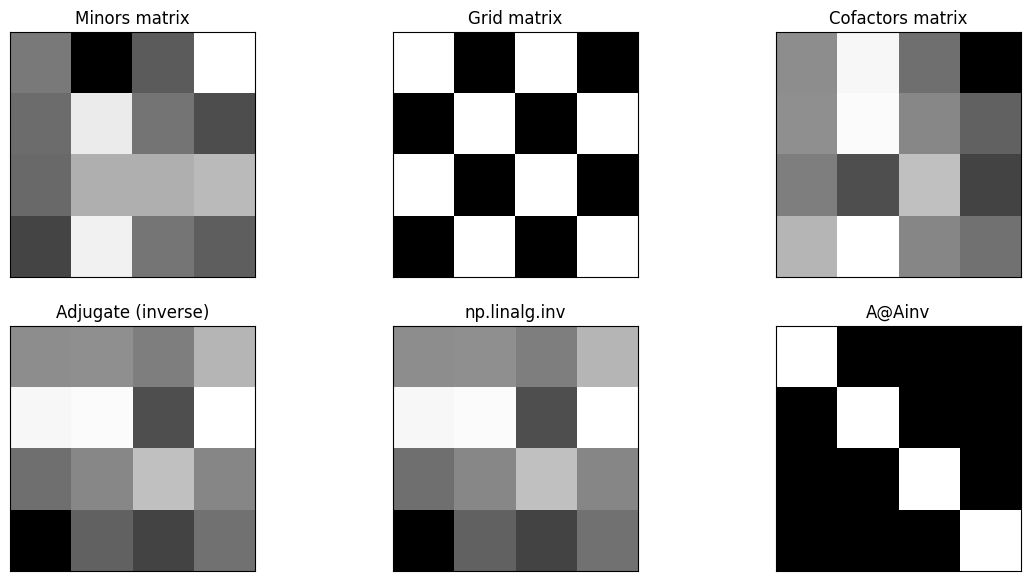

In [ ]:
import matplotlib.pyplot as plt

# plot them

fig, axs = plt.subplots(2, 3, figsize = (14, 7))

axs[0, 0].imshow(M, cmap = 'gray')
axs[0, 0].set_title('Minors matrix')

axs[0, 1].imshow(G, cmap = 'gray')
axs[0, 1].set_title('Grid matrix')

axs[0, 2].imshow(C, cmap = 'gray')
axs[0, 2].set_title('Cofactors matrix')

axs[1, 0].imshow(Ainv, cmap = 'gray')
axs[1, 0].set_title('Adjugate (inverse)')

axs[1, 1].imshow(Ainvl, cmap = 'gray')
axs[1, 1].set_title('np.linalg.inv')

axs[1, 2].imshow(A@Ainv, cmap = 'gray')
axs[1, 2].set_title('A@Ainv')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])

plt.savefig('Figure_07_03.png', dpi = 300)
plt.show()

---

## 연습 문제 3 : 직접 해보기(필기 풀이)

1. 행렬 A는 a, b, c, d 네 개의 원소로 된 2x2행렬이다.
2. 행렬 A의 역행렬은 행렬 A의 대각행렬을 바꾸고, 비대각행렬에 -1을 곱한뒤 행렬식(ad-bc)로 나누어 주면 된다.
3. 완전역행렬임을 보이는 방법은 'A@A_inv = A_inv@A = I' 임을 보이면
된다.

> 직접 손으로 풀어보았으며 3번의 식을 만족한다.


---

## 연습 문제 4 : 직접 해보기
1. 왼쪽 역행렬을 구한 원리를 이용하여 오른쪽 역행렬을 구한다.
2. 넓은 행렬에 대해 [그림 7-4]를 재현한다.

Text(0.5, 1.0, 'R@W')

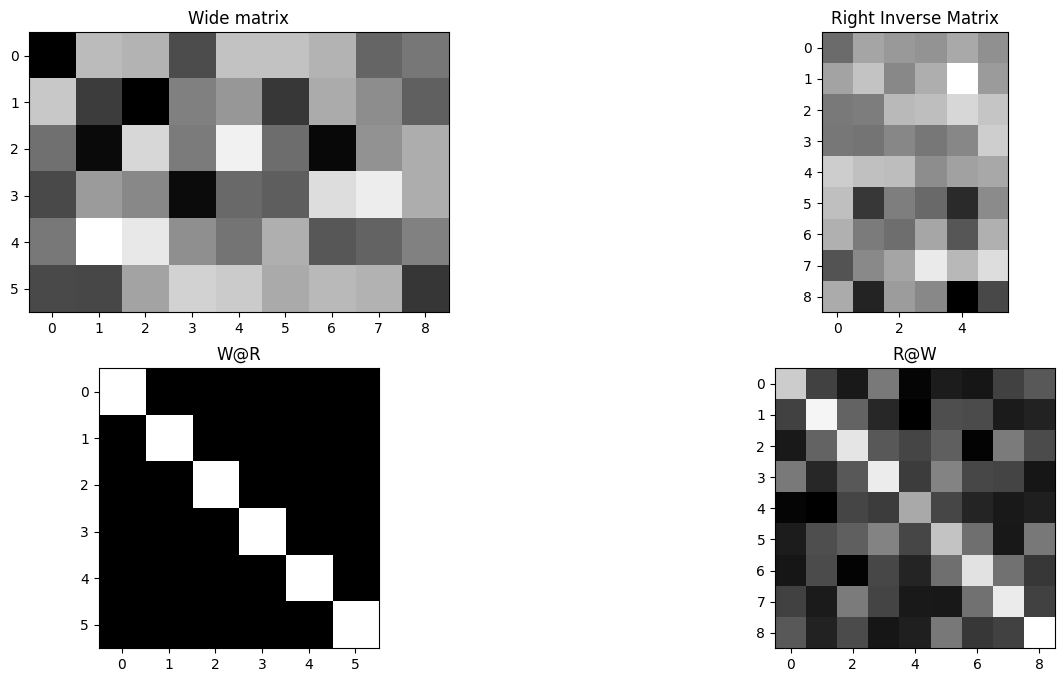

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# formula
W = np.random.randn(6, 9)
WWt = W@W.T
WWt_inv = np.linalg.inv(WWt)
R = W.T@WWt_inv

# Check with plot
fig, axs = plt.subplots(2, 2, figsize = (16, 8))

# plot
axs[0, 0].imshow(W, cmap = 'gray')
axs[0, 0].set_title('Wide matrix')

axs[0, 1].imshow(R, cmap = 'gray')
axs[0, 1].set_title('Right Inverse Matrix')

axs[1, 0].imshow(W@R, cmap = 'gray')
axs[1, 0].set_title('W@R')

axs[1, 1].imshow(R@W, cmap = 'gray')
axs[1, 1].set_title('R@W')

## 연습 문제 4 : 교재 풀이
> 왼쪽 역행렬은 높은 행렬이기에 최대 계수를 위해서 TtT를 이용하지만 오른쪽 역행렬은 넓은 행렬이기에 최대 계수를 위해 WWt를 이용함을 인지해야 한다.

In [ ]:
# Start from the code for the left-inverse, and swap as necessary.

# here's a wide matrix.
W = np.random.randint(-10, 11, size = (4, 40))

# confirm that it has its maximum possible rank(full row-rank)
print(f'This matrix has rank={np.linalg.matrix_rank(W)}\n\n')

# next, create a square full-rank matrix
WWt = W@W.T

# check whether it has an inverse
WWt_inv = np.linalg.inv(WWt)
print( np.round(WWt_inv@WWt, 4))

This matrix has rank=4


[[ 1. -0.  0. -0.]
 [ 0.  1.  0. -0.]
 [ 0.  0.  1. -0.]
 [ 0. -0.  0.  1.]]


In [ ]:
# finish creating the right-inverse

# our right-inverse
R = W.T@WWt_inv

# confirm that it works
print( np.round( W@R, 6) ), print(' ')

# but it's one-sided
print( np.round( R@W, 6) )

[[ 1.  0. -0. -0.]
 [ 0.  1.  0. -0.]
 [ 0. -0.  1.  0.]
 [ 0.  0.  0.  1.]]
 
[[ 0.181722  0.024653  0.003257 ...  0.052343  0.076522 -0.012957]
 [ 0.024653  0.116519  0.046858 ...  0.028909 -0.059769  0.102709]
 [ 0.003257  0.046858  0.045909 ... -0.005772 -0.028086  0.044619]
 ...
 [ 0.052343  0.028909 -0.005772 ...  0.099428 -0.029718  0.031683]
 [ 0.076522 -0.059769 -0.028086 ... -0.029718  0.096751 -0.079215]
 [-0.012957  0.102709  0.044619 ...  0.031683 -0.079215  0.101317]]


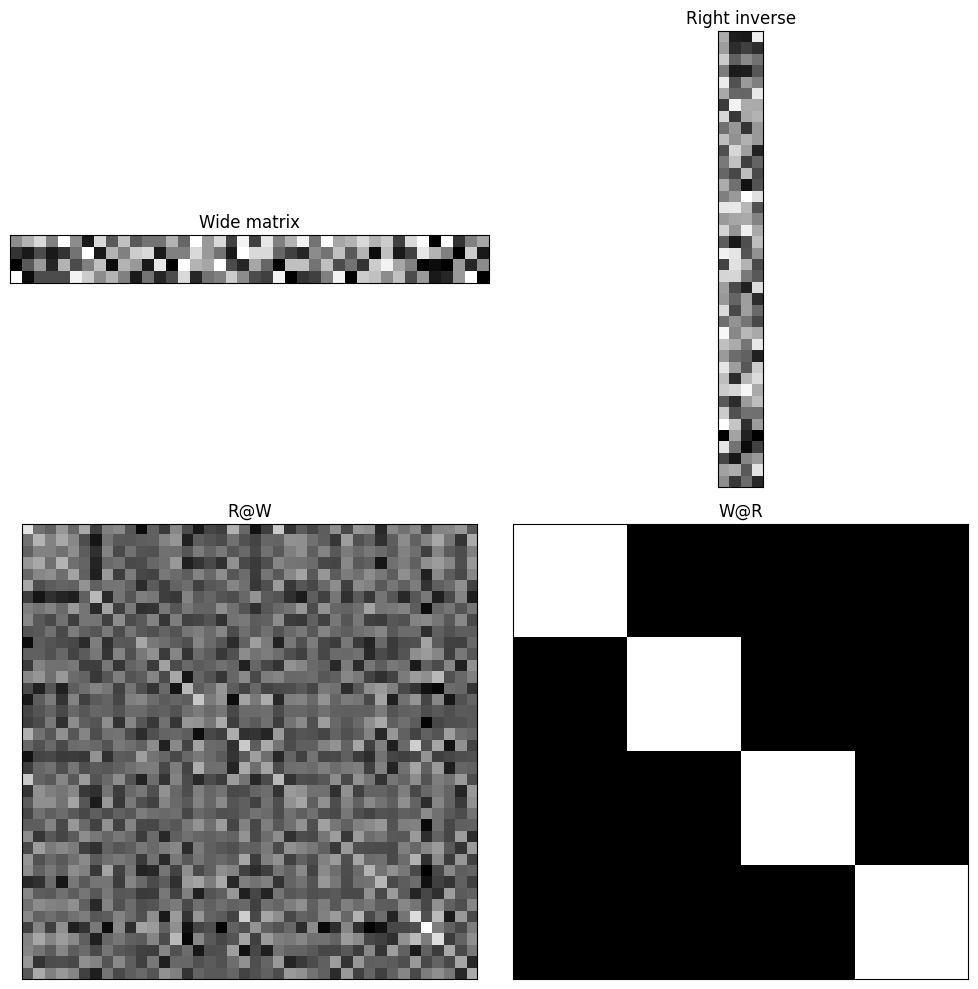

In [ ]:
# visyalize of course

fig,axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].imshow(W,cmap='gray')
axs[0,0].set_title('Wide matrix')

axs[0,1].imshow(R,cmap='gray')
axs[0,1].set_title('Right inverse')

axs[1,0].imshow(R@W,cmap='gray')
axs[1,0].set_title('R@W')

axs[1,1].imshow(W@R,cmap='gray')
axs[1,1].set_title('W@R')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])

plt.tight_layout()
plt.show()

---

## 연습 문제 5 : 직접 해보기
1. 파이썬에서 의사역행렬(np.linalg.pinv())이 가역 행렬의 완전 역행렬(np.linalg.inv())과 같다는 것을 구현.
2. 의사역행렬이 높은 행렬에서 왼쪽 역행렬, 넓은 행렬에서 오른쪽 역행렬과 동일함을 구현.

#### 완전 가역

In [ ]:
import numpy as np

A = np.random.randn(10, 10)
A_inv = np.linalg.inv(A)
A_MP = np.linalg.pinv(A)

np.isclose(A_inv, A_MP)


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

#### 왼쪽 역행렬

In [ ]:
# Create tall matrix
T = np.random.randn(10, 5)

# Set some matirices for left-inverse matrix
TtT = T.T@T
TtT_inv = np.linalg.inv(TtT)

# Compute left-inverse matrix and MP_inverse
L = TtT_inv@T.T
T_MP = np.linalg.pinv(T)

# reuslt
np.isclose(L, T_MP)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

#### 오른쪽 역행렬

In [ ]:
# Create wide matrix
W = np.random.randn(5, 10)

# Set some matrices for right-inverse matrix
WWt = W@W.T
WWt_inv = np.linalg.inv(WWt)

# Compute right-inverse matrix and MP_inverse
R = W.T@WWt_inv
W_MP = np.linalg.pinv(W)

# result
np.isclose(R, W_MP)


array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

## 연습 문제 5 : 교재 풀이


In [ ]:
# Full inverse case
M = 4

A = np.random.randn(M, M)

Ainv = np.linalg.inv(A)
Apinv = np.linalg.pinv(A)

np.round( Ainv-Apinv, 10)

array([[-0.,  0., -0., -0.],
       [ 0., -0.,  0., -0.],
       [-0., -0.,  0.,  0.],
       [ 0., -0., -0., -0.]])

In [ ]:
# left inverse case
M, N = 14, 4

A = np.random.randn(M, N)

ALeft = np.linalg.inv(A.T@A) @ A.T
Apinv = np.linalg.pinv(A)

np.round( ALeft-Apinv, 10)

array([[-0.,  0.,  0.,  0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0.,
         0.],
       [ 0.,  0., -0.,  0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,
        -0.],
       [ 0., -0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,
         0.],
       [ 0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,
         0.]])

In [ ]:
# right inverse case
M, N = 4, 14

A = np.random.randn(M, N)

ARight = A.T@np.linalg.inv(A@A.T)
Apinv = np.linalg.pinv(A)

np.round( ARight-Apinv, 10)

array([[ 0., -0.,  0.,  0.],
       [-0.,  0.,  0., -0.],
       [ 0., -0., -0., -0.],
       [-0.,  0.,  0.,  0.],
       [ 0., -0., -0., -0.],
       [-0.,  0.,  0., -0.],
       [ 0., -0., -0.,  0.],
       [ 0., -0.,  0.,  0.],
       [-0.,  0.,  0., -0.],
       [-0., -0.,  0., -0.],
       [-0.,  0.,  0., -0.],
       [ 0., -0., -0., -0.],
       [ 0., -0., -0.,  0.],
       [-0., -0., -0., -0.]])

---

## 연습 문제 6 : 직접 해보기

코딩을 시작하기 전 어느 값이 동일하게 나올지 예측.

1. LIVE EVIL 규칙을 테스트.
2. 두 개의 정방 최대계수행렬 A와 B를 생성.
3. 유클리드 거리를 사용하여 a. AB_inv, b. A_inv@B_inv, c. B_inv@A_inv를 비교한다
4. 문제에서 보여주는 형식과 같이 출력해야 한다.
5. LIVE EVIL 규칙이 네 행렬에도 적용되는지 확인한다.

In [19]:
# AB_inv는 B_inv@A_inv와 동일하다.

import numpy as np

# Create two max rank matrices
A = np.random.randn(5, 5)
B = np.random.randn(5, 5)
print(' A의 최대 계수는 : ', np.linalg.matrix_rank(A), '\n',
'B의 최대 계수는 : ', np.linalg.matrix_rank(B))

# Compute three matrices
# A_inv, B_inv
Ai = np.linalg.inv(A)
Bi = np.linalg.inv(B)
# AB_inv
AB_inv = np.linalg.inv(A@B)
# A_inv@B_inv
AiBi = Ai@Bi
# B_inv@A_inv
BiAi = Bi@Ai

# Compute the euclidean distance
print(' ')
print('(AB)^-1과 (A^-1)(B^-1) 사이의 거리는 :', round(np.linalg.norm(AB_inv - AiBi), 2))
print('(AB)^-1과 (B^-1)(A^-1) 사이의 거리는 :', round(np.linalg.norm(AB_inv - BiAi), 2))

 A의 최대 계수는 :  5 
 B의 최대 계수는 :  5
 
(AB)^-1과 (A^-1)(B^-1) 사이의 거리는 : 38.53
(AB)^-1과 (B^-1)(A^-1) 사이의 거리는 : 0.0


In [27]:
# Apply four matrices
A = np.random.randn(5, 5)
B = np.random.randn(5, 5)
C = np.random.randn(5, 5)
D = np.random.randn(5, 5)
print('A의 최대 계수는 : ', np.linalg.matrix_rank(A))
print('B의 최대 계수는 : ', np.linalg.matrix_rank(B))
print('C의 최대 계수는 : ', np.linalg.matrix_rank(C))
print('D의 최대 계수는 : ', np.linalg.matrix_rank(D))

# ABCD^-1
ABCD_inv = np.linalg.inv(A@B@C@D)

# D^-1C^-1B^-1A^-1
Di = np.linalg.inv(D)
Ci = np.linalg.inv(C)
Bi = np.linalg.inv(B)
Ai = np.linalg.inv(A)
DiCiBiAi = Di@Ci@Bi@Ai

# Compute the euclidean distance
print('(ABCD)^-1과 (D^-1)(C^-1)(B^-1)(A^-1) 사이의 거리는 :', round(np.linalg.norm(ABCD_inv - DiCiBiAi), 2))

A의 최대 계수는 :  5
B의 최대 계수는 :  5
C의 최대 계수는 :  5
D의 최대 계수는 :  5
(ABCD)^-1과 (D^-1)(C^-1)(B^-1)(A^-1) 사이의 거리는 : 0.0


## 연습 문제 6 : 교재 풀이
1. 행렬 혹은 벡터를 생성할 때는 'Create'를 사용한다. 이제 기억해 두자.
2. 교재 풀이에서는 유클리디안 거리 계산에서 브로드캐스팅 연산을 한 뒤 제곱합의 제곱근을 통해 구했다(np.sum() 이용)

In [28]:
# Create the matrices
N = 4
A = np.random.randn(N, N)
B = np.random.randn(N, N)

# compute the three specified options
op1 = np.linalg.inv(A@B)
op2 = np.linalg.inv(A) @ np.linalg.inv(B)
op3 = np.linalg.inv(B) @ np.linalg.inv(A)

# compute distances
dist12 = np.sqrt(np.sum( (op1-op2)**2 ))
dist13 = np.sqrt(np.sum( (op1-op3)**2 ))

# print results
print(f'Distance between (AB)^-1 and (A^-1)(B^-1) is {dist12:.8f}')
print(f'Distance between (AB)^-1 and (B^-1)(A^-1) is {dist13:.8f}')

Distance between (AB)^-1 and (A^-1)(B^-1) is 232.77003112
Distance between (AB)^-1 and (B^-1)(A^-1) is 0.00000000


---

## 연습 문제 7 : 직접 해보기
LIVE EVIL 규칙이 단방향 역행렬에도 적용 되는지?
1. (TtT)^-1 = (T^-t)(T^-1)인지 확인

In [35]:
# 성립하지 않을 것이다. 이유는 교환법칙이 성립하지 않기 때문이다.

import numpy as np

# Create tall matrix T
T = np.random.randn(10, 5)

# (TtT)^-1
TtT = T.T@T
TtT_inv = np.linalg.inv(TtT)

# (T^-T)(T^-1)
T_inv = np.linalg.pinv(T)
TT_inv = np.linalg.pinv(T.T)

# result
print('(TtT)^-1와 (T^-t)(T^-1)의 거리는 :', np.linalg.norm(TtT_inv - TT_inv@T_inv))


ValueError: operands could not be broadcast together with shapes (5,5) (10,10) 

## 연습 문제 7 : 교재 풀이
1. 교재와 이유는 조금 다르다.

In [36]:
# Create the matrices
M, N = 14, 4
T = np.random.randn(M, N)

# compute the three specified options
op1 = np.linalg.inv(T.T@T)
op2 = np.linalg.inv(T) @ np.linalg.inv(T.T)

# The answer is No, it doens't work ,becuase a tall matrix has no inverse.

LinAlgError: Last 2 dimensions of the array must be square

---

## 연습 문제 8 : 직접 해보기
1. [그림 7-6]을 재현하는 코드를 작성한다.
2. 먼저 [연습 문제 6-3] 코드를 복사한다.
3. 그림을 재현 후 왼쪽 아래 원소를 1로 설정하여 변환 행렬을 비가역으로 만든다.
4. 오류를 방지하기 위해 코드에서 또 무엇을 변경해야 하는가?

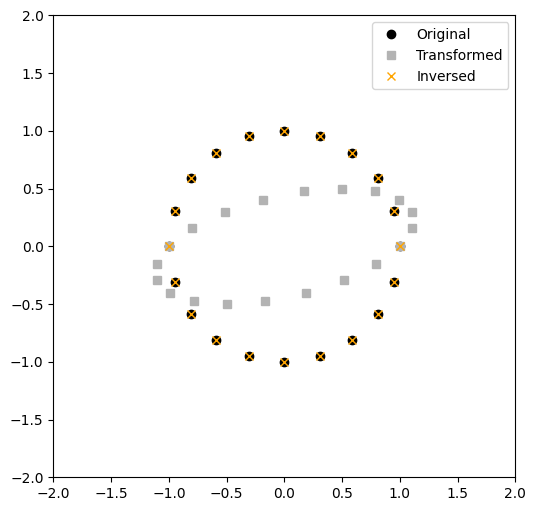

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Get code of excerise 6-3
# Transformation matrix
T = np.array([
              [1,.5],
              [0,.5]
            ])

# Compute inverse matrix of T
T_inv = np.linalg.inv(T)

# define the set of points (a circle)
theta = np.linspace(0,2*np.pi-2*np.pi/20,20)
origPoints = np.vstack( (np.cos(theta),np.sin(theta)) )

# apply transformation
transformedPoints = T @ origPoints

# apply inverse
InversedPoints = T_inv @ transformedPoints


# plot the points
plt.figure(figsize=(6,6))
plt.plot(origPoints[0,:],origPoints[1,:],'ko',label='Original')
plt.plot(transformedPoints[0,:],transformedPoints[1,:],'s',
         color=[.7,.7,.7],label='Transformed')
plt.plot(InversedPoints[0, :], InversedPoints[1, :], 'x', color = 'orange', label = 'Inversed')

plt.axis('square')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.savefig('Figure_06_08.png',dpi=300)
plt.show()

# 변환 행렬 T의 T[1][0] 원소를 1로 변환할 경우 선형 종속이 되어 완전 가역이 아니게 된다.
# 즉, 축소계수 행렬이 되기에 완전 역행렬을 계산하는 np.linalg.inv()를 사용하는 것이 아니라
# 의사역행렬을 계산하는 np.linalg.pinv()를 사용하여야 한다.

## 연습 문제 8 : 교재 풀이
1. 교재에서는 역행렬을 구하고 역변환하여 [그림 7-6]을 재현만 하였다.

In [52]:
# Transformation matrix
T = np.array([
              [1,.5],
              [0,.5]
            ])

# Compute its inverse
Ti = np.linalg.inv(T)


# define the set of points (a circle)
theta = np.linspace(0,2*np.pi-2*np.pi/20,20)
origPoints = np.vstack( (np.cos(theta),np.sin(theta)) )

# apply transformation
transformedPoints = T @ origPoints

# undo the transformation via the inverse of the transform
backTransformed   = Ti @ transformedPoints


# plot the points
plt.figure(figsize=(6,6))
plt.plot(origPoints[0,:],origPoints[1,:],'ko',label='Original')
plt.plot(transformedPoints[0,:],transformedPoints[1,:],'s',
         color=[.7,.7,.7],label='Transformed')
plt.plot(backTransformed[0,:],backTransformed[1,:],'rx',markersize=15,
         color=[.7,.7,.7],label='Inverse-transformed')

plt.axis('square')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.savefig('Figure_07_06.png',dpi=300)
plt.show()

---

## 연습 문제 9 : 직접 해보기
힐버트 행렬을 사용하여 역행렬과 수치 불안정성의 위험을 살펴볼 수 있다.
1. 힐버트 행렬을 생성한다. [식 7-1]을 이용하여 정수를 입력 받아 힐버트 행렬을 출력하는 파이썬 함수 작성.
2. [그림 7-5]를 재현.
3. 이중 for문을 사용하여 코드를 구현할 것을 권장.
4. for문을 사용하지 않고도 함수를 작성해 보기(Hint : 외적)
5. 함수의 정확성 확인. scipy.linalg 라이브러리의 힐버트 함수와 비교.

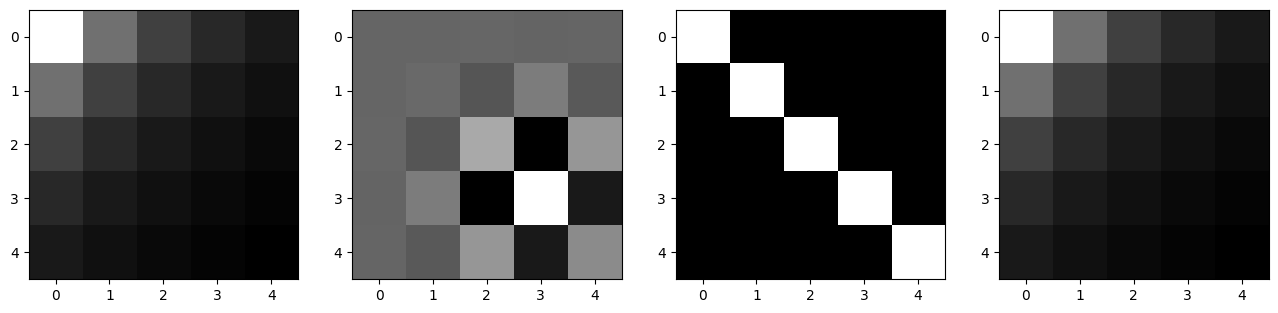

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Create Hilbert function
def Hilbert(n, m):
  H = np.zeros((n, m))

  for i in range(n):
    for j in range(m):
      H[i, j] = 1/(i+j+1)

  return H

# Set variance
n, m = 5, 5

# Test
Hilbert(n, m)

# plot
fig, axs = plt.subplots(1, 4, figsize = (16, 5))
axs[0].imshow(Hilbert(n, m), cmap = 'gray')
axs[1].imshow(np.linalg.inv(Hilbert(n, m)), cmap = 'gray')
axs[2].imshow(np.linalg.inv(Hilbert(n, m))@Hilbert(n, m), cmap = 'gray')

# Hilbert function
hf = sp.linalg.hilbert(5)
axs[3].imshow(hf, cmap = 'gray')


#### 외적 구현
외적은 어떻게 원소를 구성해야 하는지 모르겠다...

In [80]:
n = 5
# Create Hilbert function
def Hilbert(n):
  A = np.zeros(n)
  B = np.ones(n)

  for i in range(len(A)):
    A[i] = 1/(i+1)

  H = np.outer(A, B)

  return H

# Test
Hilbert(n)

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ]])

## 연습 문제 9 : 교재 풀이
1. 교재에서는 외적 함수를 사용하지 않고 브로드 캐스팅 연산을 사용하여 외적으로 구현하였다. 아래 코드를 따라서 출력하면 이해할 수 있다.

```
k = np.arange(1, 5+1).reshape(1, -1)
print(k)
print(k.T)
print(1 / (k.T+k-1))
```

In [101]:
# a function to create a Hilbert matrix
def hilbmat(k):
  H = np.zeros((k, k))
  for i in range(k):
    for j in range(k):

      # note: the math formula has denominator : i+j-1
      # but with 0-based indexing, this is : (i+1)*(j+1)-1
      # which can be shortend to : i+j+1

      H[i, j] = 1 / (i+j+1)
    return H

# The double for-loop above is a direct implementation of the math.
# The function below gives same result but without the loops
def hilbmat_out(k):
  k = np.arange(1, k+1).reshape(1, -1) # reshape to a row vector(instead of a ID array)
  return 1 / (k.T+k-1) # outer product and element-wise division

In [102]:
print( hilbmat_out(5) ), print(' ')

# you can confirm the accuracy of your function against the scipy Hilbert-matrix function:
from scipy.linalg import hilbert
print( hilbert(5) )

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
 
[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


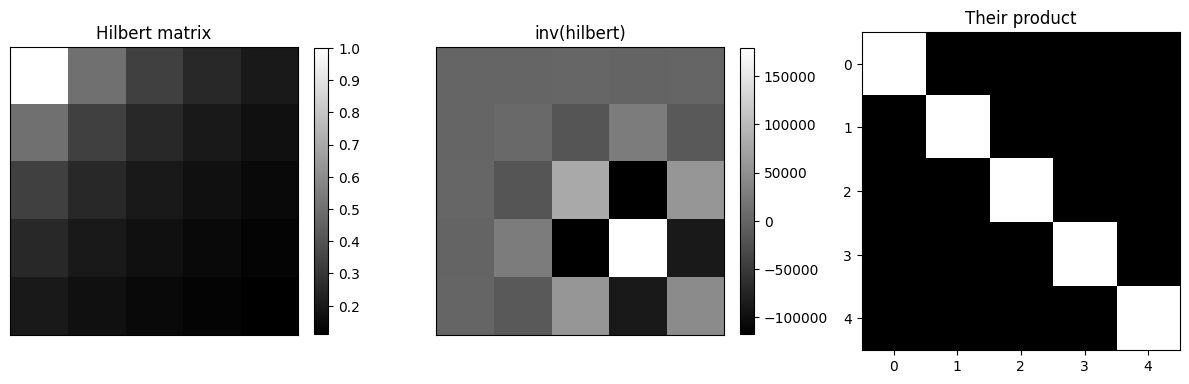

In [100]:
# Create a 5x5 Hilbert matrix and show it, tis inverse, and their product
H = hilbmat(5)
Hi = np.linalg.inv(H)

fig, axs = plt.subplots(1, 3, figsize = (12, 6))
h = [0, 0, 0]

# the matrix
h[0] = axs[0].imshow(H, cmap = 'gray')
axs[0].set_title('Hilbert matrix')

# its inverse
h[1] = axs[1].imshow(Hi, cmap = 'gray')
axs[1].set_title('inv(hilbert)')

# their product
h[2] = axs[2].imshow(H@Hi, cmap = 'gray')
axs[2].set_title('Their product')

for i in range(2):
  fig.colorbar(h[i], ax = axs[i], fraction=.045)
  axs[i].set_xticks([])
  axs[i].set_yticks([])

plt.tight_layout()
plt.savefig('Figure_07_05.png', dpi=300)
plt.show()

## 연습 문제 10 : 직접 해보기
1. 힐버트 행렬 함수를 사용하여 힐버트 행렬을 생성한다.
2. 생성한 힐버트 행렬에 np.linalg.inv()를 이용하여 역행렬을 계산한다.
3. 힐버트 행렬과 그 역행렬의 곱은 단위 행렬과 일치해야 한다. 즉, H@H_inv = np.eye()의 유클리드거리는 0이다.
4.(3x3) ~ (12x12)에 걸친 여러 크기의 행렬에 이를 테스트 하기 위해 for 문으로 구현한다.
5. 각 행렬 크기에 대해 유클리드 거리와 힐버트 행렬의 조건수를 저장한다. 이때 조건수는 np.linalg.cond()를 통해 구할 수 있다.
6. 이전 코드를 되풀이 하되 힐버트 행렬 대신 가우스 난수 행렬을 사용한다.
7. 위의 결과를 [그림 7-7]과 같이 모든 결과를 plot으로 시각화 한다(거리와 조건수를 로그 척도로 그림).

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Create Hilbert and inverse Hilbert matrices
H = sp.linalg.hilbert(5)
H_inv = np.linalg.inv(H)
print('힐버트@힐버트 역행렬과 단위 행렬의 유클리드 거리', round(np.linalg.norm(H@H_inv - np.eye(5), 2)))

힐버트@힐버트 역행렬과 단위 행렬의 유클리드 거리 0


In [124]:
# for loop
for i in range(3, 13):
  H = sp.linalg.hilbert(i)
  H_inv = np.linalg.inv(H)
  print(f'{i}x{i} 힐버트@힐버트 역행렬과 단위 행렬의 유클리드 거리', round(np.linalg.norm(H@H_inv - np.eye(i), 2)),
        f'{i}x{i} 힐버트 조건수 :', np.linalg.cond(H))

3x3 힐버트@힐버트 역행렬과 단위 행렬의 유클리드 거리 0 3x3 힐버트 조건수 : 524.0567775860644
4x4 힐버트@힐버트 역행렬과 단위 행렬의 유클리드 거리 0 4x4 힐버트 조건수 : 15513.73873892924
5x5 힐버트@힐버트 역행렬과 단위 행렬의 유클리드 거리 0 5x5 힐버트 조건수 : 476607.2502425855
6x6 힐버트@힐버트 역행렬과 단위 행렬의 유클리드 거리 0 6x6 힐버트 조건수 : 14951058.642254734
7x7 힐버트@힐버트 역행렬과 단위 행렬의 유클리드 거리 0 7x7 힐버트 조건수 : 475367356.7446793
8x8 힐버트@힐버트 역행렬과 단위 행렬의 유클리드 거리 0 8x8 힐버트 조건수 : 15257575538.060041
9x9 힐버트@힐버트 역행렬과 단위 행렬의 유클리드 거리 0 9x9 힐버트 조건수 : 493153755941.02344
10x10 힐버트@힐버트 역행렬과 단위 행렬의 유클리드 거리 0 10x10 힐버트 조건수 : 16024416987428.36
11x11 힐버트@힐버트 역행렬과 단위 행렬의 유클리드 거리 0 11x11 힐버트 조건수 : 522270131654983.3
12x12 힐버트@힐버트 역행렬과 단위 행렬의 유클리드 거리 0 12x12 힐버트 조건수 : 1.7515952300879806e+16


1. 힐버트 행렬과 난수 행렬을 (3, 3) ~ (12, 12)로 생성.
2. 생성한 힐버트 행렬과 난수 행렬 각각 단위 행렬과의 유클리드 거리를 계산하고 변수로 저장.
3. 생성한 힐버트 행렬과 난수 행렬의 조건수를 변수로 저장.
4. 시각화

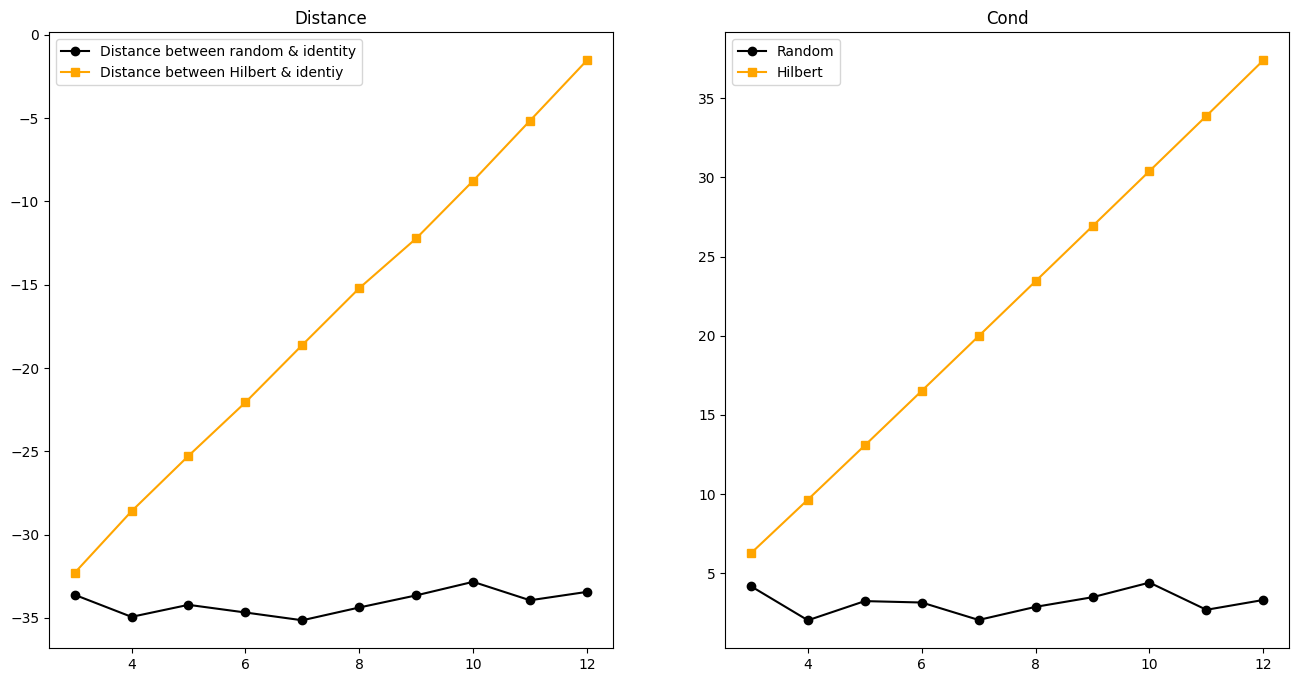

In [160]:
# Create random matrix
Rs = np.zeros(10)
Rd = np.zeros(10)
Rc = np.zeros(10)
for i in range(3, 13):
  A = np.random.randn(i, i)
  Rs[i-3] = i
  Rd[i-3] = np.sqrt(np.sum((A@np.linalg.inv(A)-np.eye(i))**2))
  Rc[i-3] = np.linalg.cond(A)

# Create Hilbert
Hd = np.zeros(10)
Hc = np.zeros(10)
for i in range(3, 13):
  B = sp.linalg.hilbert(i)
  Hd[i-3] = np.sqrt(np.sum((B@np.linalg.inv(B)-np.eye(i))**2))
  Hc[i-3] = np.linalg.cond(B)

# plot
fig, axs = plt.subplots(1, 2, figsize = (16, 8))
axs[0].plot(Rs, np.log(Rd), '-o', color = 'black', label = 'Distance between random & identity')
axs[0].plot(Rs, np.log(Hd), '-s', color = 'orange', label = 'Distance between Hilbert & identiy')
axs[0].set_title('Distance')
axs[0].legend()
axs[1].plot(Rs, np.log(Rc), '-o', color = 'black', label = 'Random')
axs[1].plot(Rs, np.log(Hc), '-s', color = 'orange', label = 'Hilbert')
axs[1].set_title('Cond')
axs[1].legend()


## 연습 문제 10 : 교재 풀이

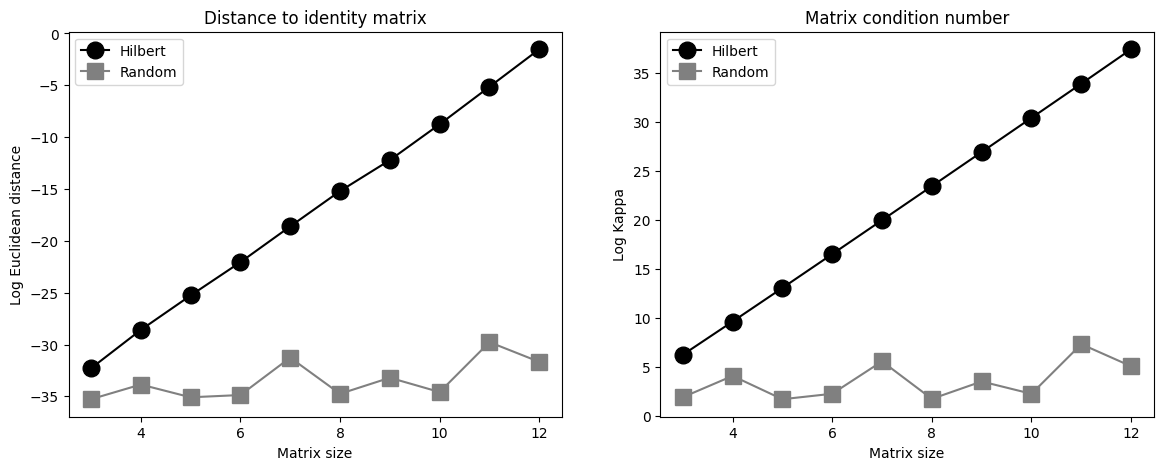

In [168]:
matSizes = np.arange(3, 13)

identityError = np.zeros((len(matSizes), 2))
condNumbers = np.zeros((len(matSizes), 2))

for i, k in enumerate(matSizes):

  ### for the Hilbert matrix
  H = hilbmat_out(k) # the matrix
  Hi = np.linalg.inv(H)
  HHi = H@Hi
  err = HHi - np.eye(k) # difference from true identity
  identityError[i, 0] = np.sqrt(np.sum(err**2)) # Euclidean distance
  condNumbers[i, 0] = np.linalg.cond(H) # condition number

  ### repeat for a random matrix
  H = np.random.randn(k, k) # the matrix
  Hi = np.linalg.inv(H) # its inverse
  HHi = H@Hi
  err = HHi - np.eye(k)
  identityError[i, 1] = np.sqrt(np.sum(err**2)) # Euclidean distance
  condNumbers[i, 1] = np.linalg.cond(H) # condition number

# now plot
fig, axs = plt.subplots(1, 2, figsize = (14, 5))

## plot the Euclidean distance to the identity matrix
h = axs[0].plot(matSizes, np.log(identityError), 's-', markersize = 12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[0].legend(['Hilbert', 'Random'])
axs[0].set_xlabel('Matrix size')
axs[0].set_ylabel('Log Euclidean distance')
axs[0].set_title('Distance to identity matrix')

## plot the condition numbers
h = axs[1].plot(matSizes, np.log(condNumbers), 's-', markersize = 12)
h[0].set_color('k') # adjust the individual line colors and shapes
h[0].set_marker('o')
h[1].set_color('gray')

axs[1].legend(['Hilbert', 'Random'])
axs[1].set_xlabel('Matrix size')
axs[1].set_ylabel('Log Kappa')
axs[1].set_title('Matrix condition number')

plt.savefig('Figure_07_07.png', dpi = 300)
plt.show()